<a href="https://colab.research.google.com/github/Alexandre77777/data_mining/blob/main/4.%20%D0%A0%D0%B5%D1%88%D0%B0%D1%8E%D1%89%D0%B8%D0%B5%20%D0%B4%D0%B5%D1%80%D0%B5%D0%B2%D1%8C%D1%8F/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F%20%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0%20%E2%84%967.%20%D0%A0%D0%B5%D1%88%D0%B0%D1%8E%D1%89%D0%B8%D0%B5_%D0%B4%D0%B5%D1%80%D0%B5%D0%B2%D1%8C%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *0. Ознакомиться с [блокнотом](https://colab.research.google.com/drive/1PwN8igT5w2xArBGmM6rvO9pVRQMh-FQn?usp=sharing)

# 1. Дерево решений для классификации

In [57]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

### Получение данных

Будем работать с набором данных для задачи классификации - данные по сердечно сосудистым заболеваниям, довольно стандартный набор для изучения машинного обучения, но его нет в `sklearn'e`. Поэтому скачиваем данные со стороны, с google диска.

Ссылка на google drive: https://drive.google.com/file/d/1Si4EJ_RexI3Q7yZU8eLjgp4ORe_BXr4G


In [63]:
!wget 'https://drive.google.com/uc?export=download&id=1Si4EJ_RexI3Q7yZU8eLjgp4ORe_BXr4G' -O cardio.csv

--2024-12-11 20:51:58--  https://drive.google.com/uc?export=download&id=1Si4EJ_RexI3Q7yZU8eLjgp4ORe_BXr4G
Resolving drive.google.com (drive.google.com)... 142.250.125.113, 142.250.125.102, 142.250.125.101, ...
Connecting to drive.google.com (drive.google.com)|142.250.125.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1Si4EJ_RexI3Q7yZU8eLjgp4ORe_BXr4G&export=download [following]
--2024-12-11 20:51:58--  https://drive.usercontent.google.com/download?id=1Si4EJ_RexI3Q7yZU8eLjgp4ORe_BXr4G&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.132.132, 2607:f8b0:4001:c00::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.132.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2941524 (2.8M) [application/octet-stream]
Saving to: ‘cardio.csv’

cardio.csv          100%[===================>]   2.80M  --.-KB/s

В задаче предалагается предсказать наличие сердечно-сосудистых заболеваний по результатам классического врачебного осмотра. Датасет сформирован 3 групп признаков:

Объективные признаки:
- Возраст (в днях)
- Рост
- Вес
- Пол

Результаты измерения:

- Артериальное давление верхнее и нижнее
- Холестерин (три группы: норма, выше нормы, значительно выше нормы)
- Глюкоза (три группы: норма, выше нормы, значительно выше нормы)

Субъективные признаки (бинарные):

- Курение
- Употребление Алкоголя
- Физическая активность

In [64]:
import pandas as pd
df = pd.read_csv('cardio.csv', sep=';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [65]:
full_features = ['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
                 'cholesterol', 'gluc', 'smoke', 'alco', 'active']
target = 'cardio'

In [66]:
df['age'] = round(df['age'] / 365)

In [67]:
df['age'].head(10)

,age
0,50.0
1,55.0
2,52.0
3,48.0
4,48.0
5,60.0
6,61.0
7,62.0
8,48.0
9,54.0


## 1. Вводная

### 1.1 Сколько вопросов будет задано на первом этапе

Посчитайте, сколько вопросов задаст дерево решений в самый первый раз, если использовать все признаки из списка full_features.

In [68]:
X = df[full_features]
y = df[target]

tree = DecisionTreeClassifier(random_state=1)
tree.fit(X, y)

n_questions_first_level = sum(tree.tree_.feature == 0)

print(f'Количество вопросов (разбиений) на первом уровне: {n_questions_first_level}')

Количество вопросов (разбиений) на первом уровне: 3291


### 1.2 Упростите задачу

Вопросов получилось достаточно, не будет моделировать столько вопросов, а попробуем уменьшить их количество.

Возьмите только два признака: weight и gluc.
А так же возьмите только 10 первых объектов.

In [69]:
features = ['weight', 'gluc']
df = df[features + [target]]
df = df.head(10)
df

,weight,gluc,cardio
0,62.0,1,0
1,85.0,1,1
2,64.0,1,1
3,82.0,1,1
4,56.0,1,0
5,67.0,2,0
6,93.0,1,0
7,95.0,3,1
8,71.0,1,0
9,68.0,1,0


### 1.3 Посчитайте еще раз, сколько будет вопросов

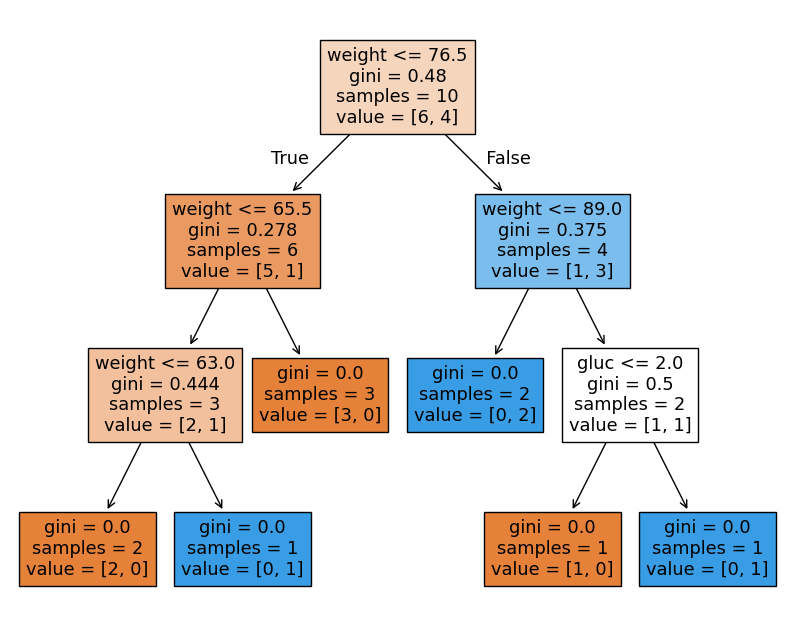

In [70]:
X = df[features]
y = df[target]

tree = DecisionTreeClassifier(random_state=1)
tree.fit(X, y)

plt.figure(figsize=(10, 8))
plot_tree(tree, feature_names=features, filled=True);

# gini - критерий для измерения качества разделения узлов в алгоритме дерева решений. Он позволяет минимизировать вероятность неправильной классификации.
# Степень Gini всегда находится в диапазоне от 0 до 1.
# 0 означает, что все элементы принадлежат определённому классу (или разделение чистое), а 1 — что элементы распределены по различным классам случайным образом.
# Значение Gini 0,5 указывает на равномерное распределение элементов по некоторым классам.

С таким количеством вопросов уже можем работать и разбираться в устройству дерева решений.

## 2. Устройство дерева решений

### 2.1 Обучите дерево решений

Обучите дерево решений из sklearn'a с атрибутом `random_state=1`.

In [71]:
# Разобьем выборку на обучающую и тестовую.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df[features],
    df['cardio'],
    test_size=0.2,
    shuffle=True,
    random_state=1
)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8, 2), (8,), (2, 2), (2,))

In [72]:
# Инициализируем дерево решений для задачи регрессии и обучим на обучающей выборке
# (X_train) и целевой переменной для обучающих объектов (y_train).

from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=1)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

### 2.2 Отрисуйте обученное дерево решений

Нарисуйте дерево решений, которое у вас получилось после обучения. Сделайте отрисовку такой, чтобы можно было понять, какие вопросы задаются

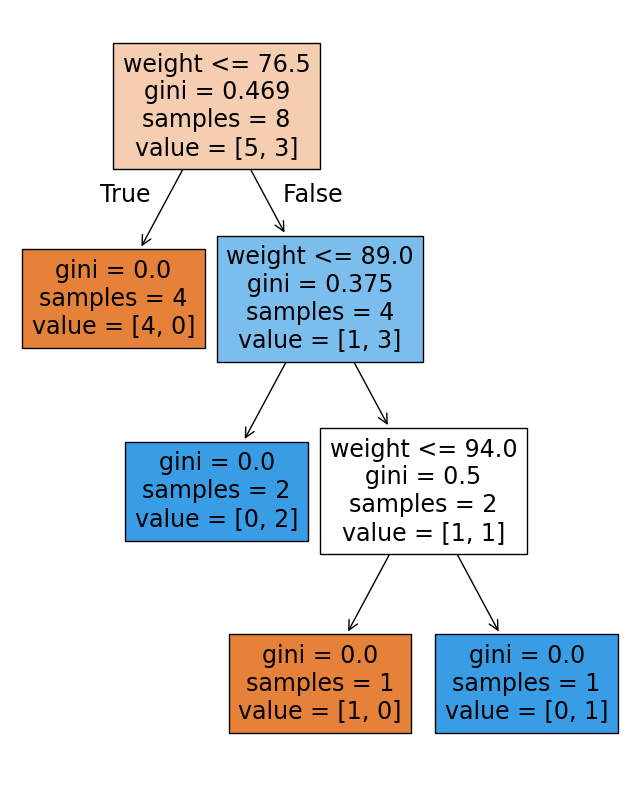

In [73]:
plt.figure(figsize=(8, 10))
plot_tree(tree, feature_names=features, filled=True);


### 2.3 Посчитайте, сколько вершин получилось

In [ ]:
# получилось 7 вершин

### 2.4 Посчитайте, сколько листов получилось

In [ ]:
# получилось 4 листа

### 2.5 Посмотрите, почему не получилось сделать разбиение ещё на два узла в крайнем левом узле.

В узле, где
```
gini=0.5
samples=2
value=[1, 1]
```

In [ ]:
# в узле, где gini=0.5 samples=2 value=[1, 1], как раз-таки получилось сделать разбиение на 2 узла




## 3. Вспомогательные функции

Для того, что бы дальше сравнивать между собой объекты нужно реализовать две вспомогательные функции.

### 3.1 Функция подсчета критерия Джини

Функция должна принимать список целевых значений, считать критерий информативности и выдавать одно значение - критерий Джини.

In [74]:
target_values = df['cardio']
def gini(target_values):
    # Посчитаем количество экземпляров каждого класса
    unique_classes, counts = np.unique(target_values, return_counts=True)

    # Общее количество наблюдений
    total = len(target_values)

    # Считаем доли для каждого класса
    probabilities = counts / total

    # Вычисляем критерий Джини
    gini_index = 1 - np.sum(probabilities ** 2)

    return gini_index

### 3.2 Проверка функции gini

Посчитайте критерий информативности в исходной выборке и вы должны получить точно такое же значение, как и было на визуализации дерева решений в его корне.

In [75]:
import numpy as np

In [76]:
gini_i = gini(target_values)
print(gini_i)

0.48


### 3.3 Функция подсчета прироста информации

Функция должна принимать целевые значения левой подвыборки, правой подвыборки и исходной вершины, а выдавать должна одно значение - прирост информации, подсчитанный на критерии информативности Джини.

In [77]:
def information_gain(root_values, left_values, right_values):
    # Количество образцов
    N_total = len(root_values)
    N_left = len(left_values)
    N_right = len(right_values)

    # Считаем критерий Джини для исходной выборки, левой и правой подвыборок
    G_root = gini(root_values)
    G_left = gini(left_values)
    G_right = gini(right_values)

    # Прирост информации
    weighted_gini = (N_left / N_total) * G_left + (N_right / N_total) * G_right
    info_gain = G_root - weighted_gini

    return info_gain

# Разбиение по признаку 'weight' (например, среднее значение веса)
split_value = X_train['weight'].mean()

# Формируем левую и правую подвыборки
left_mask = X_train['weight'] < split_value
right_mask = X_train['weight'] >= split_value

# Целевые значения для исходной выборки, левой и правой подвыборок
root_values = y_train
left_values = y_train[left_mask]
right_values = y_train[right_mask]

# Вычисляем прирост информации
info_gain = information_gain(root_values, left_values, right_values)
print(f'Прирост информации при разбиении по весу: {info_gain:.4f}')

Прирост информации при разбиении по весу: 0.2812


Теперь вспомогательные функции готовы можем моделировать работу обученного дерева решений.

## 4. Процесс построения дерева решений

### 4.1 Получение первого вопроса


4.1.1 Пройдитесь по всем возможным вопросам для исходного набора данных


Можете сохранять полученные значения прироста информации в датафрейм в удобную для вас структуру данных.

In [78]:
# Инициализируем список для хранения результатов
results = []

# Пройдемся по всем признакам и их уникальным значениям
for feature in features:
    unique_values = X_train[feature].unique()

    for value in unique_values:
        # Создаем маски для левой и правой подвыборок
        left_mask = X_train[feature] < value
        right_mask = X_train[feature] >= value

        # Целевые значения для исходной выборки, левой и правой подвыборок
        root_values = y_train
        left_values = y_train[left_mask]
        right_values = y_train[right_mask]

        # Проверяем, есть ли данные в обеих подвыборках
        if len(left_values) > 0 and len(right_values) > 0:
            # Вычисляем прирост информации
            IG = information_gain(root_values, left_values, right_values)
            results.append({'feature': feature, 'value': value, 'IG': IG})

# Преобразуем результаты в DataFrame
results_df = pd.DataFrame(results)

# Выводим DataFrame с результатами
print(results_df)

  feature  value        IG
0  weight   93.0  0.010417
1  weight   62.0  0.040179
2  weight   82.0  0.281250
3  weight   85.0  0.102083
4  weight   95.0  0.111607
5  weight   71.0  0.168750
6  weight   67.0  0.093750
7    gluc    3.0  0.111607
8    gluc    2.0  0.010417


4.1.2 Найдите самый лучший вопрос, опираясь на прирост информации

In [79]:
best_question = results_df.loc[results_df['IG'].idxmax()]
print(f'Лучший вопрос: Признак = {best_question["feature"]}, Значение = {best_question["value"]}, Прирост информации = {best_question["IG"]:.4f}')

Лучший вопрос: Признак = weight, Значение = 82.0, Прирост информации = 0.2812


4.1.3. Сделайте разбиение по этому вопросу исходных данных на две подвыборки df_left и df_right


In [80]:
# Разбиваем исходные данные на подвыборки
feature = best_question['feature']
value = best_question['value']

df_left = df[df[feature] < value]
df_right = df[df[feature] >= value]

print(df_left, df_right, sep = '\n\n')

   weight  gluc  cardio
0    62.0     1       0
2    64.0     1       1
4    56.0     1       0
5    67.0     2       0
8    71.0     1       0
9    68.0     1       0

   weight  gluc  cardio
1    85.0     1       1
3    82.0     1       1
6    93.0     1       0
7    95.0     3       1


4.1.4. Проверьте себя через визуализацию дерева решений

[Text(0.3333333333333333, 0.875, 'weight <= 76.5\ngini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.16666666666666666, 0.625, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.25, 0.75, 'True  '),
 Text(0.5, 0.625, 'weight <= 89.0\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.41666666666666663, 0.75, '  False'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.6666666666666666, 0.375, 'weight <= 94.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8333333333333334, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

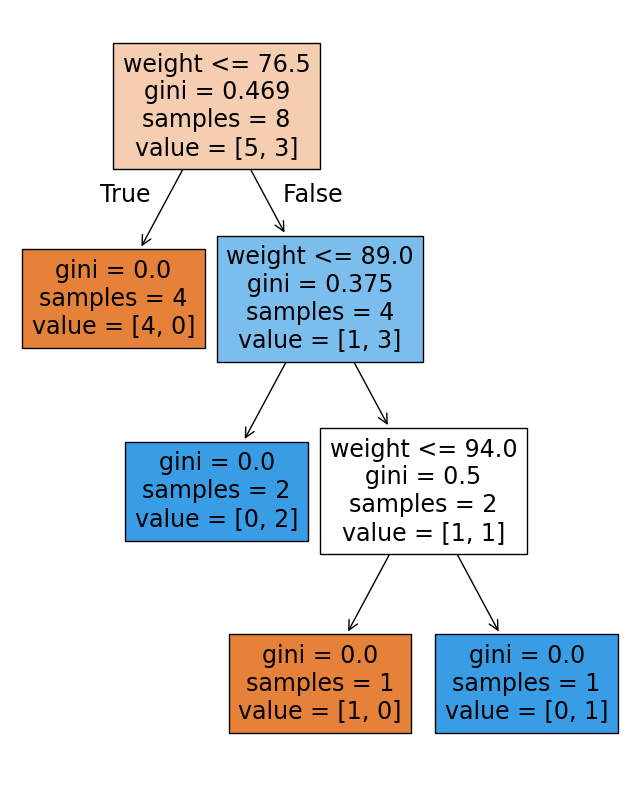

In [81]:
plt.figure(figsize=(8, 10))
plot_tree(tree, feature_names=features, filled=True)

### 4.2 Получение второго вопроса


4.2.1. Глядя на df_left и df_right, посмотрите, где можно сделать ещё разбиение

In [ ]:
# спорные моменты у значения 64.0 и <=82

4.2.2. Пройдитесь по всем признакам в выбранной подвыборке

In [82]:
# Определим функцию для поиска лучшего разбиения с учетом прироста информации
def find_best_split(data, target):
    results = []
    features = data.columns.drop(target)  # Исключаем целевой признак из признаков

    # Пройдемся по всем признакам и их уникальным значениям
    for feature in features:
        unique_values = data[feature].unique()

        for value in unique_values:
            # Создаем маски для левой и правой подвыборок
            left_mask = data[feature] < value
            right_mask = data[feature] >= value

            # Целевые значения для исходной выборки, левой и правой подвыборок
            root_values = data[target]
            left_values = root_values[left_mask]
            right_values = root_values[right_mask]

            # Проверяем, есть ли данные в обеих подвыборках
            if len(left_values) > 0 and len(right_values) > 0:
                # Вычисляем прирост информации
                IG = information_gain(root_values, left_values, right_values)
                results.append({'feature': feature, 'value': value, 'IG': IG})

    # Преобразуем результаты в DataFrame
    results_df = pd.DataFrame(results)
    # Находим строку с максимальным приростом информации
    best_question = results_df.loc[results_df['IG'].idxmax()]

    return best_question

4.2.3 Найдите самый лучший вопрос, опираясь на прирост информации

In [83]:
# Используем эту функцию для подвыборки df_left
best_question_left = find_best_split(df_left, 'cardio')
print(f'Лучший вопрос для df_left: Признак = {best_question_left["feature"]}, '
      f'Значение = {best_question_left["value"]}, Прирост информации = {best_question_left["IG"]:.4f}')
# Аналогично можно сделать для df_right, если нужно
best_question_right = find_best_split(df_right, 'cardio')
print(f'Лучший вопрос для df_right: Признак = {best_question_right["feature"]}, '
      f'Значение = {best_question_right["value"]}, Прирост информации = {best_question_right["IG"]:.4f}')

Лучший вопрос для df_left: Признак = weight, Значение = 67.0, Прирост информации = 0.0556
Лучший вопрос для df_right: Признак = weight, Значение = 93.0, Прирост информации = 0.1250


4.2.4. Сделайте разбиение по этому вопросу исходных данных на две подвыборки df_left и df_right


In [84]:
# Разделим df_left на две подвыборки на основе лучшего вопроса
feature_left = best_question_left['feature']
value_left = best_question_left['value']

df_left_left = df_left[df_left[feature_left] < value_left]
df_left_right = df_left[df_left[feature_left] >= value_left]

# Разделим df_right на две подвыборки на основе лучшего вопроса
feature_right = best_question_right['feature']
value_right = best_question_right['value']

df_right_left = df_right[df_right[feature_right] < value_right]
df_right_right = df_right[df_right[feature_right] >= value_right]

# Выводим подвыборки
print("Разделение df_left:")
print(df_left_left, df_left_right, sep="\n\n")
print("\nРазделение df_right:")
print(df_right_left, df_right_right, sep="\n\n")

Разделение df_left:
   weight  gluc  cardio
0    62.0     1       0
2    64.0     1       1
4    56.0     1       0

   weight  gluc  cardio
5    67.0     2       0
8    71.0     1       0
9    68.0     1       0

Разделение df_right:
   weight  gluc  cardio
1    85.0     1       1
3    82.0     1       1

   weight  gluc  cardio
6    93.0     1       0
7    95.0     3       1


4.2.5. Проверьте себя через визуализацию дерева решений

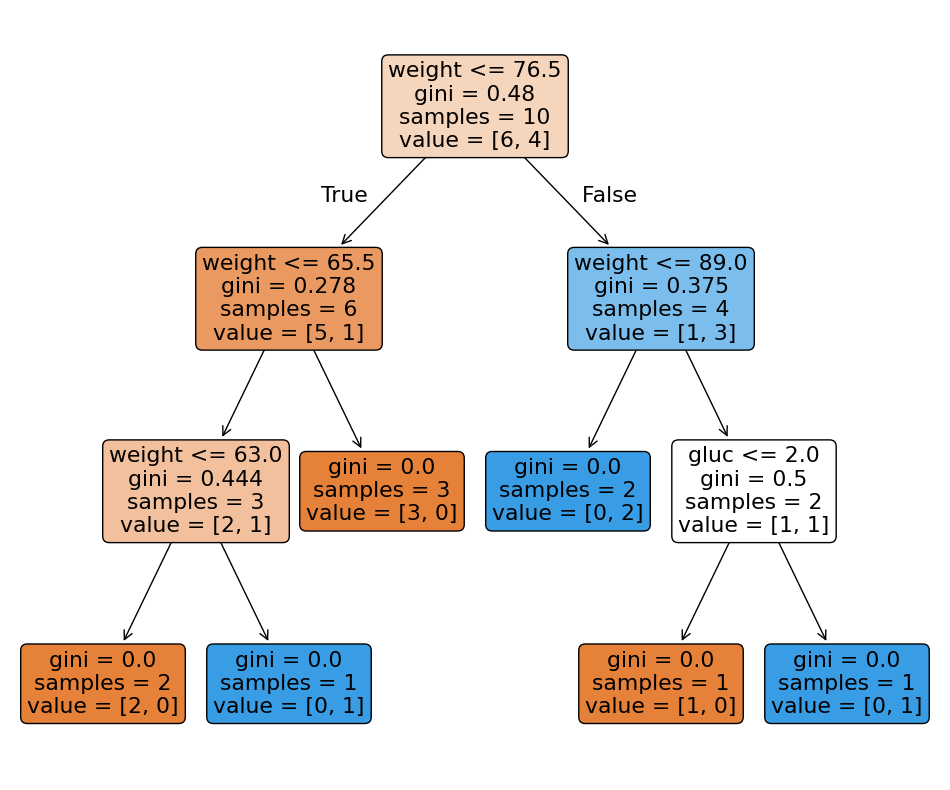

In [85]:
# Обучаем дерево решений на всей выборке
tree = DecisionTreeClassifier(random_state=1)
tree.fit(df[features], df[target])  # Используем полный набор данных

# Визуализация дерева решений
plt.figure(figsize=(12, 10))
plot_tree(tree, feature_names=features, filled=True, rounded=True)
plt.show()

4.2.6. Если что-то не сошлось, посмотрите, в чем может быть проблема

In [ ]:
# сошлось

# 2. Дерево решений для регрессии

In [111]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
import pandas as pd
import matplotlib.pyplot as plt

### 1. Получение данных load_breat_cancer

Будем работать с набором данных для задачи регрессии `load_diabetes`, который можно получить из стандартных датасетов в `sklearn'e`.

После `load_diabetes()` возвращается словарь с данными (`data`), целевой переменной (`target`), названиями характеристик в данных (`feature_names`) и описанием данных (`DESCR`).

In [112]:
from sklearn.datasets import load_diabetes

data = load_diabetes()
data

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [113]:
X = data.data
features = data.feature_names
y = data.target

Из признаков (характеристик данных) и целевой переменной сформируем датафрейм, в качестве названий колонок возьмем названия признаков.

In [114]:
df = pd.DataFrame(X, columns=features)
df['target'] = y

df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


Разобьем выборку на две: обучающую и тестовую.

In [115]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df[features],
    df['target'],
    test_size=0.2,
    shuffle=True,
    random_state=3
)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((353, 10), (353,), (89, 10), (89,))

### 1.1. Обучение дерева решений

1. Инициализируйте дерево решений для задачи регрессии
2. Обучите его на обучающей выборке

In [116]:
from sklearn.tree import DecisionTreeRegressor
# Пока обучимся на параметрах по умолчанию:
# max_depth=None
# min_samples_leaf=1
# max_leaf_nodes=None

tree = DecisionTreeRegressor(random_state=1)
tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

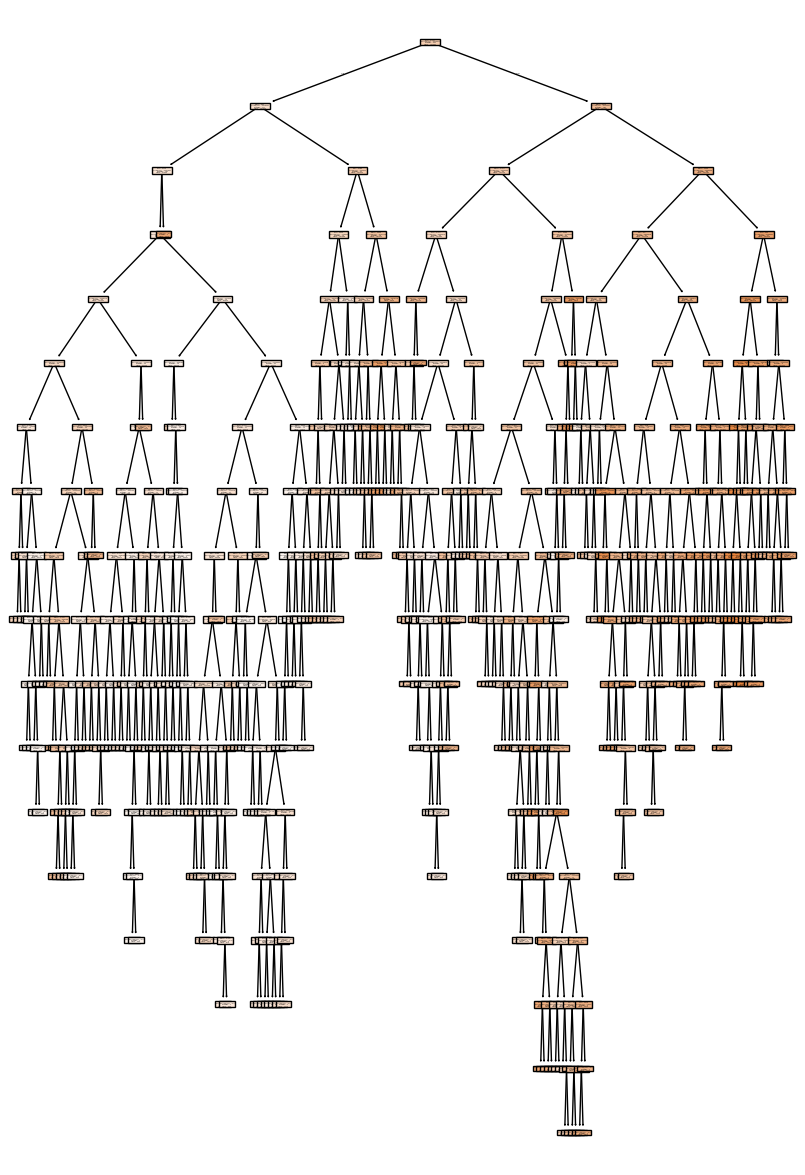

In [117]:
from sklearn.tree import plot_tree

plt.figure(figsize=(10, 15))
plot_tree(tree, feature_names=features, filled=True);

### 1.2. Получение метрик качества
Узнаем, насколько дерево решений обучилось хорошо, для этого
1. Сделайте предсказания моделью для обучающей выборки
2. Сделайте предсказания моделью для тестовой выборки
3. Посчитайте метрику качества средне-квадратичная ошибка
4. Посчитайте метрику качества коэффициент детерминации

In [119]:
#1
y_train_pred = tree.predict(X_train)

#2
y_test_pred = tree.predict(X_test)

#3
import numpy as np
def mse(true, pred):
    return np.mean(np.square(true - pred))
mse_1 = mse(y_train, y_train_pred)
mse_2 = mse(y_test, y_test_pred)

#4 https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html и https://habr.com/ru/articles/558084/
from sklearn.metrics import r2_score
r2_1 = r2_score(y_train, y_train_pred)
r2_2 = r2_score(y_test, y_test_pred)

print(f"Предсказания моделью для обучающей выборки: {y_train_pred}")
print(f"Предсказания моделью для тестовой выборки: {y_test_pred}")
print(f"Cредне-квадратичная ошибка обчающей: {mse_1}")
print(f"Cредне-квадратичная ошибка тестовой: {mse_2}")
print(f"Коэффициент детерминации обучающей: {r2_1}")
print(f"Коэффициент детерминации тестовой: {r2_2}")

Предсказания моделью для обучающей выборки: [ 89. 160. 109. 198.  72. 274. 258. 121. 272. 168. 128.  72. 280.  84.
 172. 192. 181. 140. 127.  67. 232. 108. 125. 332. 118. 109. 257. 308.
  52. 164. 104.  79.  65.  52. 132. 225.  92. 101.  90. 235. 186.  85.
 245.  87. 178. 245. 198.  72. 101. 155. 252.  49.  97.  42. 235. 142.
 190.  48. 104. 113. 129. 310. 137. 212. 116. 229. 202. 163. 243.  63.
 173. 191. 120. 160. 292. 200.  39. 102. 262. 170. 161.  61. 135. 173.
 146.  95. 277. 116. 147.  81. 179. 264.  70. 138.  54.  51.  45. 311.
  39.  86. 103. 208. 201. 206. 265. 180. 252.  88. 148.  71.  97. 253.
  88.  94.  92. 107. 163. 131.  55. 118.  60. 174.  64.  83. 131.  94.
 268. 182.  53. 191.  60. 153.  42. 237.  55. 187.  49. 233. 232. 225.
  37. 277. 222. 206.  80. 241. 189.  47. 283. 172. 126. 270. 261.  90.
  78.  90.  74.  69.  93. 141. 107. 143. 178. 258. 111.  69.  65. 296.
 202.  78. 109. 135. 113. 179. 142.  49. 110. 246. 197. 236. 113. 150.
  72. 128. 252. 162. 185. 144.  8

Сделайте вывод, насколько хорошо обучилась модель

In [120]:
# Зачастую, при R2 стремящемуся к 1, линия регрессии лучше подогнана к точкам данных
# и больше изменчивости в y объясняется независимой переменной X.
# Чем меньше среднеквадратическая ошибка, тем лучше, соответственно,
# модель обучилась хорошо на обучающей выборке (подгоняет ответы),
# и очень плохо адаптируется на тестовой, модель переобучилась.

### 1.3. Изменение метрики

Попробуйте поизменять известные параметры для того, чтобы метрика стала лучше.

In [94]:
# для переобучения модели нужно:
# уменьшать max_depth (максимальное кол-во уровней с вопросами)
# уменьшать max_leaf_nodes (максимальное кол-во листьев)
# увеличивать min_samples_leaf (минимальное кол-во объектов в одном листе)
# Изначально: max_depth = 17
# max_leaf_nodes > 35
# min_samples_leaf

In [121]:
tree_2 = DecisionTreeRegressor(random_state=1,
                               max_depth=10,
                               max_leaf_nodes=10,
                               min_samples_leaf=10)
tree_2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, max_leaf_nodes=10, min_samples_leaf=10,
                      random_state=1)

In [122]:
#1
y_train_pred = tree_2.predict(X_train)

#2
y_test_pred = tree_2.predict(X_test)

#3
def mse(true, pred):
    return np.mean(np.square(true - pred))
mse_1 = mse(y_train, y_train_pred)
mse_2 = mse(y_test, y_test_pred)

#4
r2_1 = r2_score(y_train, y_train_pred)
r2_2 = r2_score(y_test, y_test_pred)

#print(f"Предсказания моделью для обучающей выборки: {y_train_pred}")
#print(f"Предсказания моделью для тестовой выборки: {y_test_pred}")
print(f"Cредне-квадратичная ошибка обчающей: {mse_1}")
print(f"Cредне-квадратичная ошибка тестовой: {mse_2}")
print(f"Коэффициент детерминации обучающей: {r2_1}")
print(f"Коэффициент детерминации тестовой: {r2_2}")

Cредне-квадратичная ошибка обчающей: 2759.0405038794684
Cредне-квадратичная ошибка тестовой: 3378.4495784957962
Коэффициент детерминации обучающей: 0.5439313786847231
Коэффициент детерминации тестовой: 0.3760594503920953


In [144]:
tree_3 = DecisionTreeRegressor(random_state=1,
                               max_depth=8,
                               max_leaf_nodes=20,
                               min_samples_leaf=5)
tree_3.fit(X_train, y_train)

#1
y_train_pred = tree_3.predict(X_train)

#2
y_test_pred = tree_3.predict(X_test)

#3
def mse(true, pred):
    return np.mean(np.square(true - pred))
mse_1 = mse(y_train, y_train_pred)
mse_2 = mse(y_test, y_test_pred)

#4
r2_1 = r2_score(y_train, y_train_pred)
r2_2 = r2_score(y_test, y_test_pred)

print(f"Cредне-квадратичная ошибка обчающей: {mse_1}")
print(f"Cредне-квадратичная ошибка тестовой: {mse_2}")
print(f"Коэффициент детерминации обучающей: {r2_1}")
print(f"Коэффициент детерминации тестовой: {r2_2}")

Cредне-квадратичная ошибка обчающей: 2084.2344850075665
Cредне-квадратичная ошибка тестовой: 3759.244073592346
Коэффициент детерминации обучающей: 0.6554766243052288
Коэффициент детерминации тестовой: 0.30573336706958176


In [151]:
tree_4 = DecisionTreeRegressor(random_state=1,
                               max_depth=5,
                               max_leaf_nodes=15,
                               min_samples_leaf=10)
tree_4.fit(X_train, y_train)

#1
y_train_pred = tree_4.predict(X_train)

#2
y_test_pred = tree_4.predict(X_test)

#3
def mse(true, pred):
    return np.mean(np.square(true - pred))
mse_1 = mse(y_train, y_train_pred)
mse_2 = mse(y_test, y_test_pred)

#4
r2_1 = r2_score(y_train, y_train_pred)
r2_2 = r2_score(y_test, y_test_pred)

print(f"Cредне-квадратичная ошибка обчающей: {mse_1}")
print(f"Cредне-квадратичная ошибка тестовой: {mse_2}")
print(f"Коэффициент детерминации обучающей: {r2_1}")
print(f"Коэффициент детерминации тестовой: {r2_2}")

Cредне-квадратичная ошибка обчающей: 2496.6590989715573
Cредне-квадратичная ошибка тестовой: 3546.426633168216
Коэффициент детерминации обучающей: 0.5873029513118222
Коэффициент детерминации тестовой: 0.34503702623607435


### 2. Получение данных make_regression

Для второго примера возьмем самодельный набор данных для задачи регрессии `make_regression`, который можно получить из стандартных датасетов в `sklearn'e`.

Сгенерируем себе 100к объектов, которые описываются 20 признаками, из них 12 будут дейтсвительно полезными.

In [152]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=100_000, n_features=20, n_informative=12, random_state=10)

In [153]:
X.shape, y.shape

((100000, 20), (100000,))

Разобьем выборку на две: обучающую и тестовую.

In [154]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    shuffle=True,
    random_state=3
)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((80000, 20), (80000,), (20000, 20), (20000,))

### 2.1. Обучение дерева решений

1. Инициализируйте дерево решений для задачи регрессии
2. Обучите его на обучающей выборке

In [155]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(random_state=1)
tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

### 2.2. Получение метрик качества
Узнаем, насколько дерево решений обучилось хорошо, для этого
1. Сделайте предсказания моделью для обучающей выборки
2. Сделайте предсказания моделью для тестовой выборки
3. Посчитайте метрику качества средне-квадратичная ошибка
4. Посчитайте метрику качества коэффициент детерминации

In [156]:
#1
y_train_pred = tree.predict(X_train)

#2
y_test_pred = tree.predict(X_test)

#3
import numpy as np
def mse(true, pred):
    return np.mean(np.square(true - pred))
mse_1 = mse(y_train, y_train_pred)
mse_2 = mse(y_test, y_test_pred)

#4
from sklearn.metrics import r2_score
r2_1 = r2_score(y_train, y_train_pred)
r2_2 = r2_score(y_test, y_test_pred)

#print(f"Предсказания моделью для обучающей выборки: {y_train_pred}")
#print(f"Предсказания моделью для тестовой выборки: {y_test_pred}")
print(f"Cредне-квадратичная ошибка обчающей: {mse_1}")
print(f"Cредне-квадратичная ошибка тестовой: {mse_2}")
print(f"Коэффициент детерминации обучающей: {r2_1}")
print(f"Коэффициент детерминации тестовой: {r2_2}")

Cредне-квадратичная ошибка обчающей: 0.0
Cредне-квадратичная ошибка тестовой: 16649.860589567856
Коэффициент детерминации обучающей: 1.0
Коэффициент детерминации тестовой: 0.6916004851223545


Сделайте вывод, насколько хорошо обучилась модель

In [101]:
# ah, sh*t here we go again

### 2.3. Перебор гиперпараметров

Осуществите перебор параметров для получения лучших результатов (GridSearchCV, см. подход из п.0).

In [157]:
from sklearn.model_selection import GridSearchCV, cross_val_score

tree_params = {"max_depth": range(1, 8), "max_features": range(4, 12)}
tree_grid = GridSearchCV(tree, tree_params, cv=5, n_jobs=-1, verbose=True)
tree_grid.fit(X_train, y_train)

Fitting 5 folds for each of 56 candidates, totalling 280 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=1), n_jobs=-1,
             param_grid={'max_depth': range(1, 8),
                         'max_features': range(4, 12)},
             verbose=True)

In [159]:
tree_grid.best_params_

{'max_depth': 7, 'max_features': 10}

In [160]:
tree_grid.best_score_

0.5722458150169143

In [161]:
tree_2 = DecisionTreeRegressor(random_state=1,
                               max_depth=7,
                               max_leaf_nodes=10)
tree_2.fit(X_train, y_train)

#1
y_train_pred = tree_2.predict(X_train)

#2
y_test_pred = tree_2.predict(X_test)

#3
def mse(true, pred):
    return np.mean(np.square(true - pred))
mse_1 = mse(y_train, y_train_pred)
mse_2 = mse(y_test, y_test_pred)

#4
r2_1 = r2_score(y_train, y_train_pred)
r2_2 = r2_score(y_test, y_test_pred)

print(f"Cредне-квадратичная ошибка обчающей: {mse_1}")
print(f"Cредне-квадратичная ошибка тестовой: {mse_2}")
print(f"Коэффициент детерминации обучающей: {r2_1}")
print(f"Коэффициент детерминации тестовой: {r2_2}")

Cредне-квадратичная ошибка обчающей: 35732.292138281024
Cредне-квадратичная ошибка тестовой: 35985.30057567083
Коэффициент детерминации обучающей: 0.3388677391293302
Коэффициент детерминации тестовой: 0.33345692712786945


In [103]:
# Ваш вывод здесь

![](https://forum.pandawow.me/uploads/monthly_2024_08/image.png.bff6cdf68bfd562d07eebb843d026547.png)